# Titanic Survival Prediction

## Predict survival on the Titanic Data using LogReg, KNN, SVM, Neural Networks, Decision Trees, Random Forest ...

---

[Titanic: Machine Learning from Disaster | Kaggle](https://www.kaggle.com/c/titanic) is a well-known competition in Machine Learning and Data Science. The problem description and data sets can be found [here](https://www.kaggle.com/c/titanic). In this assignment, you are asked to use Logistic Regression, KNN and SVM to predict the survival on the Titanic. <br>
<br>
What sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.


After the first two assignments, we believe you know well on acquiring the training and testing data, preparing/cleaning the data, analyzing the data, selecting features, and modeling/predicting/solving the problem. Therefore, in this assignment, few hints will be given. Challenge yourself.

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning packages
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

# Other possible packages
# import Tensorflow as tf
# import xgboost as xgb

# import keras ...
#from keras.models import Sequential
#from keras.layers import Dense, Activation, Dropout
#from keras.optimizers import SGD, RMSprop
#from keras.regularizers import l2

---

### Acquire data


In [2]:
train = pd.read_csv('/Users/cherylto/Desktop/WCD-ML-Student-B3/lab/lecture_4_classification_2_neural_nets/data/train (1).csv')
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
test = pd.read_csv("/Users/cherylto/Desktop/WCD-ML-Student-B3/lab/lecture_4_classification_2_neural_nets/data/test.csv")
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


## Analyze Features

In [4]:
#Checking for duplicated, none found
print("Number of dupliated columns:", sum(train.duplicated()))

Number of dupliated columns: 0


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
print("Numerica variables:", train.describe().columns)

Numerica variables: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


First thoughts: <br>
* Age and Cabin number has many missing values <br>
* Missing values Cabin  is in cabin is not a big problem, but Age will be useful in the prediction, so I will need to clean this <br>
* It can be useful to determine passenger age from their titles <br>
* SibSp and Parch can be used to determine whether the passenger is travelling on their own or with a family  <br>


These columns do not appear to be very useful, and will be removed:  <br>
* PassengerId <br>
* Ticket number <br>
* Cabin - there are quite a few missing values, does not offer any new useful information <br>
 <br>
 
y: Survived  <br>
Steps:
1) Remove unrelated columns <br>
3) Use pairplots to explore data  <br>
4) Build models



### Dropping Columns

In [8]:
to_drop = ['PassengerId', 'Ticket', 'Cabin']
train.drop(to_drop, axis = 1, inplace = True)

### Filling missing values

In [9]:
#Missing Age
for name in train['Name']:
    train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.', expand = True)
    
train.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [10]:
#Reducing the number of titles
Miss = ["Miss", "Mlle"]
Mr = ["Mr", "Col", "Sir", "Don", "Jonkheer", "Capt", "Major"]
Mrs = ["Mrs", "Mme", "Lady", "Countess"]
Master = ["Master"]

T = []
for i in range(len(train)):
    if train['Title'][i] in Miss:
        t = "Miss"
        T.append(t)
    elif train['Title'][i] in Mr:
        t = "Mr"
        T.append(t)
    elif train['Title'][i] in Mrs:
        t = "Mrs"
        T.append(t)
    elif train['Title'][i] == "Master":
        t = "Master"
        T.append(t)
    elif train['Title'][i] == "Rev":
        t = "Rev"
        T.append(t)
    else: 
        t = "Dr"
        T.append(t)

In [11]:
train['Title'] = T

In [12]:
median_ages = train.groupby('Title')['Age'].median()

In [13]:
train.Title.value_counts()

Mr        525
Miss      184
Mrs       128
Master     40
Dr          8
Rev         6
Name: Title, dtype: int64

In [14]:
Titles = ["Mr", "Miss", "Mrs", "Master", "Dr", "Rev"]

In [15]:
new_age = []
for i in range(len(train)):
    if np.isnan(train.iloc[i]['Age']):
        if train.iloc[i]['Title'] == "Dr":
            new_age.append(median_ages[0])
        elif train.iloc[i]['Title'] == "Master":
            new_age.append(median_ages[1])
        elif train.iloc[i]['Title'] == "Miss":
            new_age.append(median_ages[2])
        elif train.iloc[i]['Title'] == "Mr":
            new_age.append(median_ages[3])
        elif train.iloc[i]['Title'] == "Mrs":
            new_age.append(median_ages[4])
        elif train.iloc[i]['Title'] == "Rev":
            new_age.append(median_ages[6])
            
    else:
        new_age.append(train.iloc[i]['Age'])
        
print(len(new_age))

891


In [16]:
train['Age'] = new_age

In [17]:
train.info() #no more missing values in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
Title       891 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


### Let's create some simple plots to get an idea of who survives and who goes down with Jack

/Users/cherylto/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


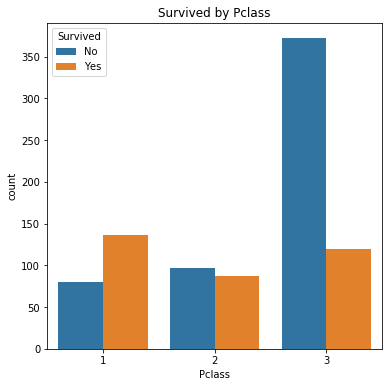

In [18]:
#Survived x Pclass
plt.subplots(figsize = (6,6))
ax = sns.countplot(x = 'Pclass', hue = 'Survived', data = train)
plt.title("Survived by Pclass")
leg = ax.get_legend()
legs = leg.texts
legs[0].set_text('No')
legs[1].set_text('Yes')

Text(0.5,1,'Survived by Class')

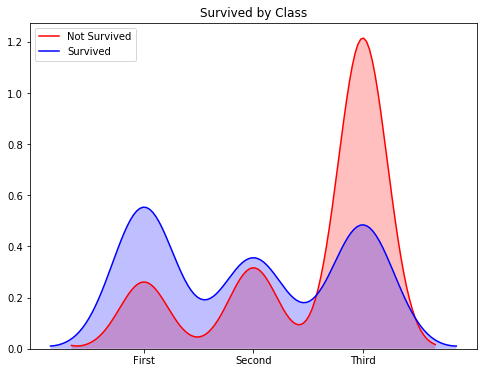

In [19]:
plt.subplots(figsize = (8,6))
sns.kdeplot(train.loc[(train['Survived'] == 0), 'Pclass'], shade = True, color = 'r', label = 'Not Survived')
ax = sns.kdeplot(train.loc[(train['Survived'] == 1), 'Pclass'], shade = True, color = 'b', label = 'Survived')

labels = ['First', 'Second', 'Third']
plt.xticks(sorted(train.Pclass.unique()), labels)
plt.title('Survived by Class')

(-1.1849905950191557,
 1.1215830947290122,
 -1.1883045120621447,
 1.120177510931536)

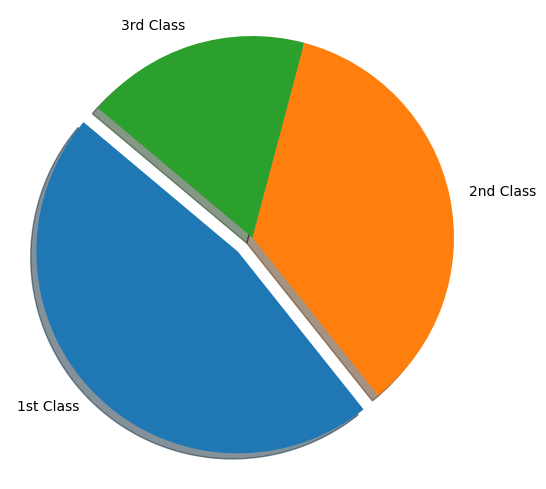

In [20]:
#Survived by Class
plt.rcdefaults()
plt.subplots(figsize = (6,6))
s = round(train.groupby('Pclass')['Survived'].mean()*100, 2)
labels = '1st Class', '2nd Class', '3rd Class'
sizes = [s.values[0], s.values[1], s.values[2]]
explode = (0.1, 0,0)
plt.pie(sizes, explode = explode, labels = labels, shadow = True, startangle=140)
plt.axis('equal')

/Users/cherylto/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


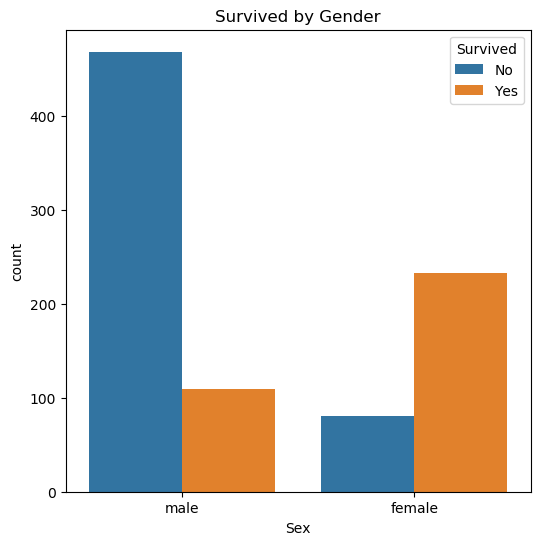

In [21]:
#Gender x Survived
plt.subplots(figsize = (6,6))
ax = sns.countplot(x = 'Sex', hue = 'Survived', data = train)
plt.title("Survived by Gender")
leg = ax.get_legend()
legs = leg.texts
legs[0].set_text('No')
legs[1].set_text('Yes')

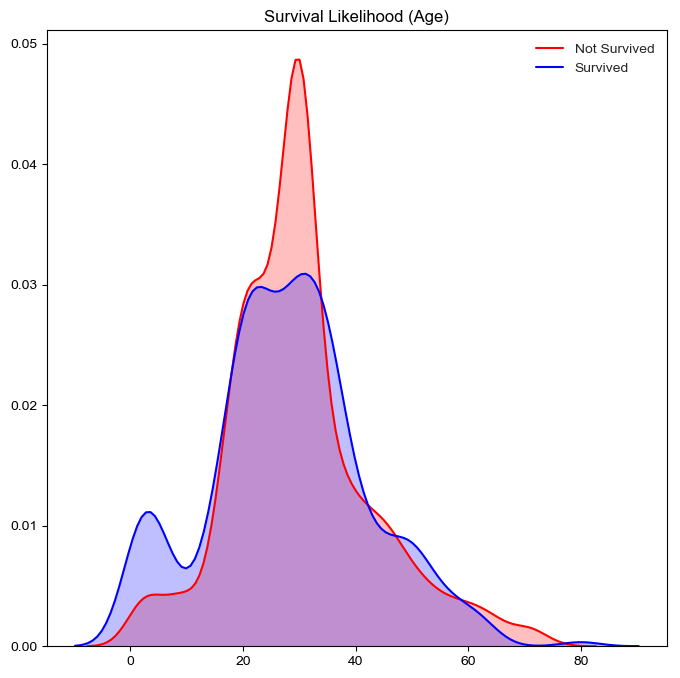

In [22]:
#Survived by Age
plt.subplots(figsize = (8,8))
plt.title('Survival Likelihood (Age)')
sns.set_style(style = 'darkgrid')
sns.kdeplot(train.loc[(train['Survived'] == 0), 'Age'], shade = True, color = 'r', label = 'Not Survived')
ax = sns.kdeplot(train.loc[(train['Survived'] == 1), 'Age'], shade = True, color = 'b', label = 'Survived')


In [23]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.387396,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.261963,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Correlation

Text(0.5,1,'Correlation Plot')

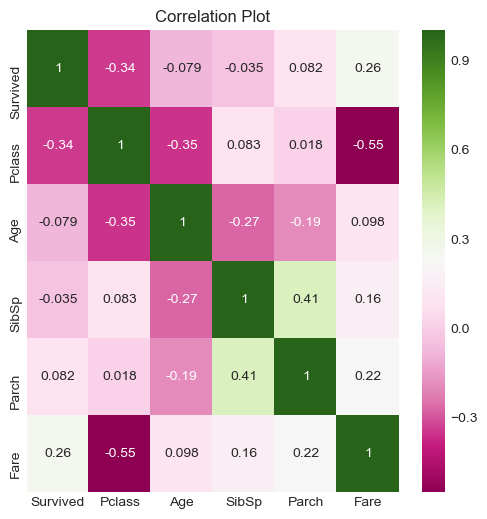

In [24]:
#plt.xkcd()
plt.subplots(figsize = (6,6))
train.corr()
corr = train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           annot = True,
           cmap = "PiYG")
plt.title("Correlation Plot")

### Feature Engineering

In [25]:
train['family_size'] = train['SibSp'] + train['Parch'] + 1

In [26]:
#Alone or not
alone = []
for i in train['family_size']:
    if i <= 1:
        a = 1
        alone.append(a)
    else:
        a = 0
        alone.append(a)
    

In [27]:
train['aloneornot'] = alone

In [28]:
train['Sex'] = pd.factorize(train.Sex)[0] #0: Male, 1:Female

In [29]:
train['Embarked'] = pd.factorize(train.Embarked)[0]

In [30]:
#The last thing to do before predicting is to put ages into bins
child = []
for i in train.Age:
    if i <= 16:
        child.append(1)
    else:
        child.append(0)
        
train['child'] = child

In [31]:
age_group = []
for i in train.Age:
    if i <=1:
        age_group.append('infant')
    elif i <=4:
        age_group.append('toddler')
    elif i <=13:
        age_group.append('child')
    elif i <=18:
        age_group.append('teen')
    elif i <= 35:
        age_group.append('y_adult')
    elif i <=45:
        age_group.append('adult')
    elif i < 55:
        age_group.append('middle_age')
    elif i < 65:
        age_group.append('senior')
    else:
        age_group.append('old')
        

In [32]:
train['Age_group'] = age_group

In [33]:
train['Age_group'] = pd.factorize(train['Age_group'])[0]

In [34]:
train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,family_size,aloneornot,child,Age_group
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,Mr,2,0,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1,Mrs,2,0,0,1


In [35]:
#dropping unnecessary variables
to_drop = ['Name', 'Fare', 'Title', 'Age']
train.drop(to_drop, axis = 1, inplace = True)

## Model, predict and solve

Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

In this assignment, we are required to use Logistic Regression, KNN and SVM.

In [36]:
# need to fill
"""
X_train = ...
Y_train = ...
X_test  = ...
X_train.shape, Y_train.shape, X_test.shape
"""

'\nX_train = ...\nY_train = ...\nX_test  = ...\nX_train.shape, Y_train.shape, X_test.shape\n'

#### Logistic Regression

In [37]:
#Model 1
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score


from sklearn.model_selection import train_test_split
X = train[['Pclass', 'Sex', 'Age_group']]
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg = LogisticRegression(solver = 'liblinear', penalty = 'l1')
logreg.fit(X_train, y_train)
predict = logreg.predict(X_test)
print("Model 1 accuracy:", accuracy_score(y_test, predict))

Model 1 accuracy: 0.7653631284916201


In [38]:
#Model 2
from sklearn.model_selection import train_test_split
X = train.iloc[:, 1:]
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg1 = LogisticRegression(solver = 'liblinear', penalty = 'l1')
logreg1.fit(X_train, y_train)
predict = logreg1.predict(X_test)
acc_log = round(logreg1.score(X_train, y_train)*100, 2)
print(confusion_matrix(y_test, predict))
print("Model 2 accuracy:", round(accuracy_score(y_test, predict)*100, 4)) #Including more features has greater accuracy
print("Model 2 precision_score:", round(precision_score(y_test, predict)*100, 2))
print("Model 2 recall score:", round(recall_score(y_test, predict)*100, 2))

[[91 14]
 [20 54]]
Model 2 accuracy: 81.0056
Model 2 precision_score: 79.41
Model 2 recall score: 72.97


Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. Reference [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression).

Note the confidence score generated by the model based on our training dataset.

We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).



#### Log Odds

In [39]:
# need to fill

coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)


,Feature,Correlation
1,Sex,2.572817
2,SibSp,0.076204
0,Pclass,-0.853967
3,Parch,NaN
4,Embarked,NaN
5,family_size,NaN
6,aloneornot,NaN
7,child,NaN
8,Age_group,NaN


Observations: <br>
* Gender has highest correlation with 2.5 <br>
* Pclass has second highest correlation in the other direction <br>
<b> ***Suggests that females and 1st class passengers more likely to survive

Next we model using Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of **two categories**, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. Reference [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine).

Note that the model generates a confidence score which is higher than Logistics Regression model.

In [40]:
# Support Vector Machines
## need to fill
svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
print("SVC accuracy:", round(svc.score(X_train, y_train)*100, 2))
print("precision:", round(91/(91+20)*100, 2))
print("recall:", round(91/(91+14)*100, 2))
confusion_matrix(y_test, y_pred)


SVC accuracy: 83.43
precision: 81.98
recall: 86.67


/Users/cherylto/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:194: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[91, 14],
       [20, 54]])

In [41]:
# Linear SVC
## need to fill
linear_svc = LinearSVC()
linear_svc.fit(X_train,y_train)
y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

print("SVC accuracy:", round(linear_svc.score(X_train, y_train)*100, 2))
print("recall:", round(92/(92+13)*100, 2))
print("precision:", round(92/(92+22)*100, 2))
# print accuracy
confusion_matrix(y_test, y_pred)

SVC accuracy: 80.9
recall: 87.62
precision: 80.7


/Users/cherylto/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:912: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([[92, 13],
       [22, 52]])

In pattern recognition, the k-Nearest Neighbors algorithm (or KNN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. Reference [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).

KNN confidence score is better than Logistics Regression but worse than SVM.

In [42]:
# KNN - need to fill
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train)*100, 2)

print("KNN Accuracy:", round(knn.score(X_train, y_train)*100, 2))
print("recall:", round(92/(92+13)*100, 2))
print("precision:", round(92/(92+30)*100, 2))
confusion_matrix(y_test, y_pred)

KNN Accuracy: 84.69
recall: 87.62
precision: 75.41


array([[92, 13],
       [30, 44]])

### Model evaluation

We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set. 

In [43]:

models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Linear SVC'],
    'Score': [acc_svc, acc_knn, acc_log, acc_linear_svc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,KNN,84.69
0,Support Vector Machines,83.43
2,Logistic Regression,80.90
3,Linear SVC,80.90
